In [76]:
%matplotlib inline

import AnalysisFunctions as af
import SimFunctions as sf
import Utils as utils

import pandas as pd
import numpy as np
import datetime
import math
import os

In [49]:
gspc = pd.read_csv(r'data\prices\pulled\SNP500\^GSPC.csv', index_col=0, header=0).squeeze("columns")
spy = pd.read_csv(r'data\prices\pulled\SNP500\SPY.csv', index_col=0, header=0).squeeze("columns")
spxl = pd.read_csv(r'data\prices\pulled\SNP500\SPXL.csv', index_col=0, header=0).squeeze("columns")

spy_aligned = sf.removeNonMatches(gspc, spy);
spy_sim_aligned = sf.removeNonMatches(spy, gspc);
spxl_aligned = sf.removeNonMatches(gspc, spxl);

In [50]:
startDate = "1962-01-02"

In [92]:
spy_returns = sf.returns(spy_aligned[startDate:]).rename("SPY")
spy_sim_returns = sf.returns(spy_sim_aligned[startDate:]).rename("SPY Sim")
spy_sim_returns2 = sf.sim_leverage(spy_sim_aligned[startDate:], leverage=1, expense_ratio=-0.019).rename("SPY Sim2")

In [93]:
adj = (spy_returns[-1] - spy_sim_returns[-1])/(spy_sim_returns[-1] - 1)
print (adj)
adj = .7
spy_sim_returns_adj = (spy_sim_returns*(1+adj) - adj).rename("SPY Est")

adj = (spy_returns[-1] - spy_sim_returns2[-1])/(spy_sim_returns2[-1] - 1)
print (adj)
adj = .0
spy_sim_returns_adj2 = (spy_sim_returns2*(1+adj) - adj).rename("SPY Est")


print(spy_returns[0], spy_returns[-1])
print(spy_sim_returns[0], spy_sim_returns[-1])
print(spy_sim_returns_adj2[0], spy_sim_returns_adj2[-1])

0.8216271398873761
-0.020016983323652548
1.0 16.351270934285544
1.0 9.427230028662535
1.0 16.664833648189138


<AxesSubplot: xlabel='Date'>

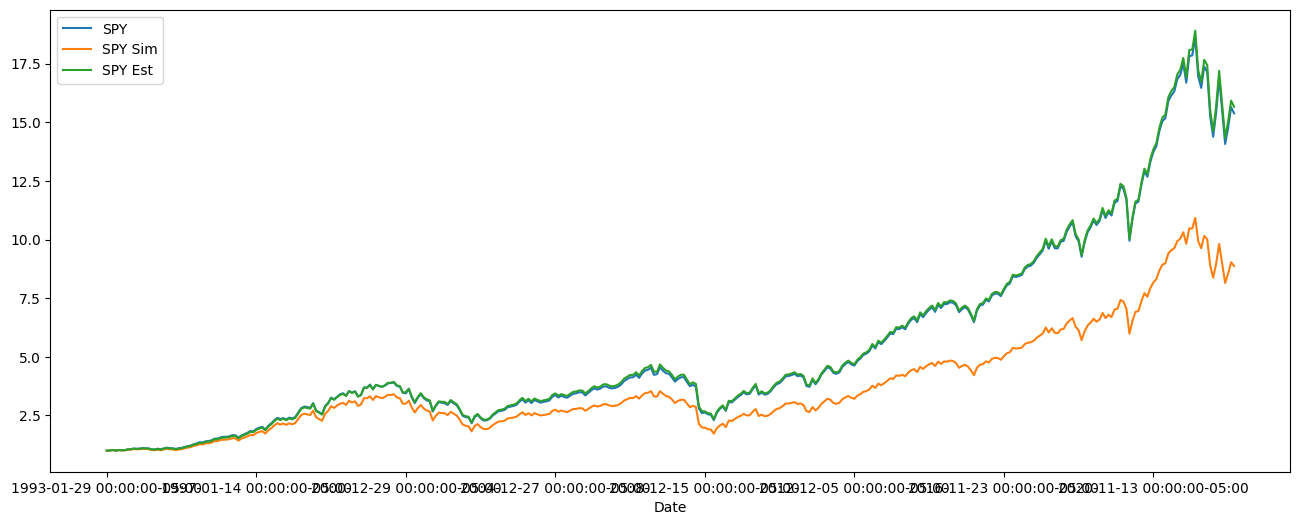

In [94]:
spy_returns[::20].plot(legend=True, figsize=(16,6))
spy_sim_returns[::20].plot(legend=True)
spy_sim_returns_adj2[::20].plot(legend=True)

In [98]:
spxl_sim_aligned = sf.removeNonMatches(spxl, spy_sim_returns_adj);
spxl_returns = sf.returns(spxl).rename("SPY 3x")

In [158]:
spxl_sim_returns = sf.sim_leverage(spxl_sim_aligned, leverage=3, expense_ratio=-0.009).rename("SPY 3x Sim")

adj = (spxl_returns[-1] - spxl_sim_returns[-1])/(spxl_sim_returns[-1] - 1)
print (adj)
adj = 0.0
spxl_sim_returns_adj = (spxl_sim_returns*(1+adj) - adj).rename("SPY 3x Est")

print(spxl_returns[0], spxl_returns[-1])
print(spxl_sim_returns[0], spxl_sim_returns[-1])
print(spxl_sim_returns_adj[0], spxl_sim_returns_adj[-1])

0.007929186521428357
1.0 22.609140192904903
1.0 22.43914521166165
1.0 22.43914521166165


<AxesSubplot: xlabel='Date'>

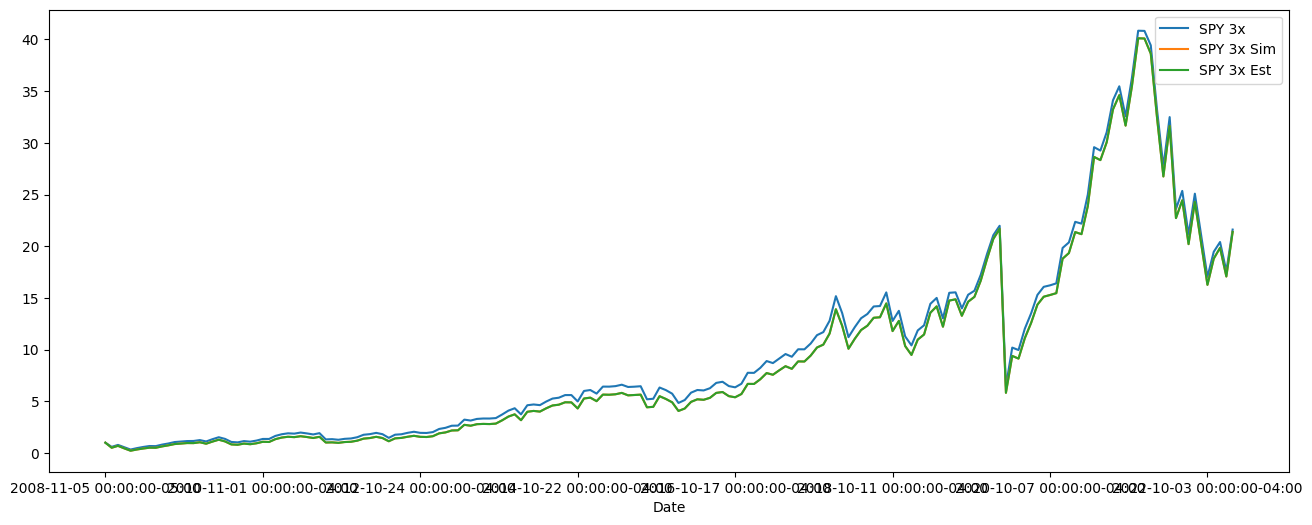

In [159]:
spxl_returns[::20].plot(legend=True, figsize=(16,6))
spxl_sim_returns[::20].plot(legend=True)
spxl_sim_returns_adj[::20].plot(legend=True)

In [12]:
# Actual saving based on above
gspc = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\SNP500\^GSPC.csv', index_col=0, header=0).squeeze("columns"))[startDate:]
print(gspc.index[0])

spy_sim = sf.returns(gspc)
spy_sim_adj = 0.7
spy_sim = (spy_sim * (1 + spy_sim_adj) - spy_sim_adj)
sf.saveData(spy_sim, 'SPY_Sim_1962', r'data\prices\sim\fromIndexes\SNP500')

spxl_sim = sf.sim_leverage(spy_sim, leverage=3, expense_ratio=0.009)
spxl_sim_adj = 1.1
spxl_sim = (spxl_sim * (1 + spxl_sim_adj) - spxl_sim_adj)
sf.saveData(spxl_sim, 'SPXL_Sim_1962', r'data\prices\sim\fromIndexes\SNP500')

1962-01-02


In [160]:
# Actual saving based on above
#gspc = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\SNP500\^GSPC.csv', index_col=0, header=0).squeeze("columns"))
print(gspc.index[0])

spy_sim = sf.sim_leverage(gspc, leverage=1, expense_ratio=-0.019)
sf.saveData(spy_sim, 'SPY_Sim_1927', r'data\prices\sim\fromIndexes\SNP500')

spxl_sim = sf.sim_leverage(spy_sim, leverage=3, expense_ratio=-0.009)
sf.saveData(spxl_sim, 'SPXL_Sim_1927', r'data\prices\sim\fromIndexes\SNP500')

1927-12-30


<AxesSubplot: >

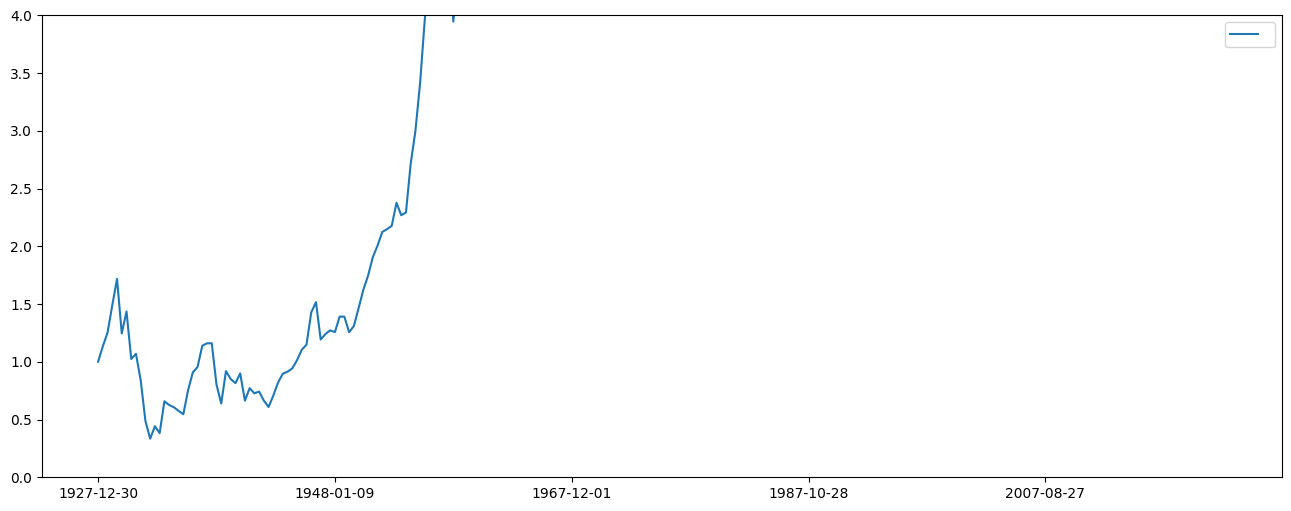

In [169]:
spy_sim[::100].plot(legend=True, figsize=(16,6), ylim=[0,4])
#spxl_sim[::100].plot(legend=True)

<AxesSubplot: >

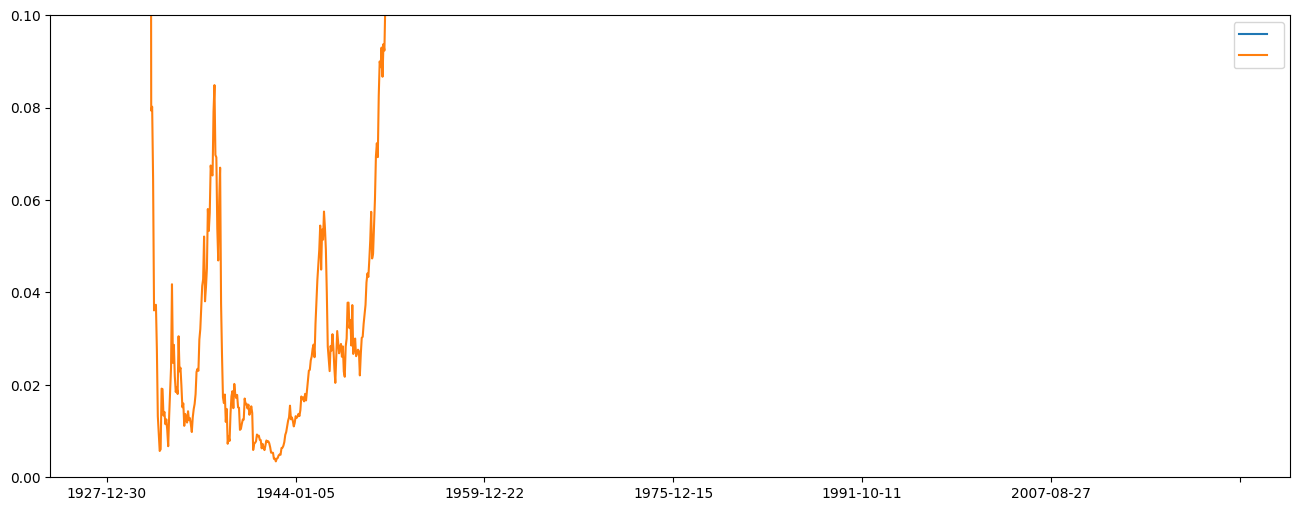

In [162]:
spy_sim[::20].plot(legend=True, figsize=(16,6),ylim=[0,.1])
spxl_sim[::20].plot(legend=True)

In [127]:
ndx = pd.read_csv(r'data\prices\pulled\NASDAQ100\NDX.csv', index_col=0, header=0).squeeze("columns")
qqq = pd.read_csv(r'data\prices\pulled\NASDAQ100\QQQ.csv', index_col=0, header=0).squeeze("columns")
tqqq = pd.read_csv(r'data\prices\pulled\NASDAQ100\TQQQ.csv', index_col=0, header=0).squeeze("columns")

qqq_aligned = af.removeNonMatches(ndx, qqq);
qqq_sim_aligned = af.removeNonMatches(qqq, ndx);
tqqq_aligned = af.removeNonMatches(ndx, tqqq);

In [134]:
qqq_returns = af.returns(qqq_aligned).rename("QQQ")
qqq_sim_returns = af.returns(qqq_sim_aligned).rename("QQQ Sim")
qqq_sim_returns2 = af.sim_leverage(qqq_sim_aligned, leverage=1, expense_ratio=0.002).rename("QQQ Sim2")

In [137]:
adj = (qqq_returns[-1] - qqq_sim_returns[-1])/(qqq_sim_returns[-1] - 1)
print (adj)
adj = 0.155
qqq_sim_returns_adj = (qqq_sim_returns*(1+adj) - adj).rename("QQQ Est")

adj = (qqq_returns[-1] - qqq_sim_returns2[-1])/(qqq_sim_returns2[-1] - 1)
print (adj)
qqq_sim_returns_adj2 = (qqq_sim_returns2*(1+adj) - adj).rename("QQQ Est")

print(qqq_returns[0], qqq_returns[-1])
print(qqq_sim_returns[0], qqq_sim_returns[-1])
print(qqq_sim_returns_adj[0], qqq_sim_returns_adj[-1])

0.15588040564348923
0.2239806653257245
1.0 6.973493889230196
1.0 6.1679169056462175
1.0 6.968944026021381


<AxesSubplot: xlabel='Date'>

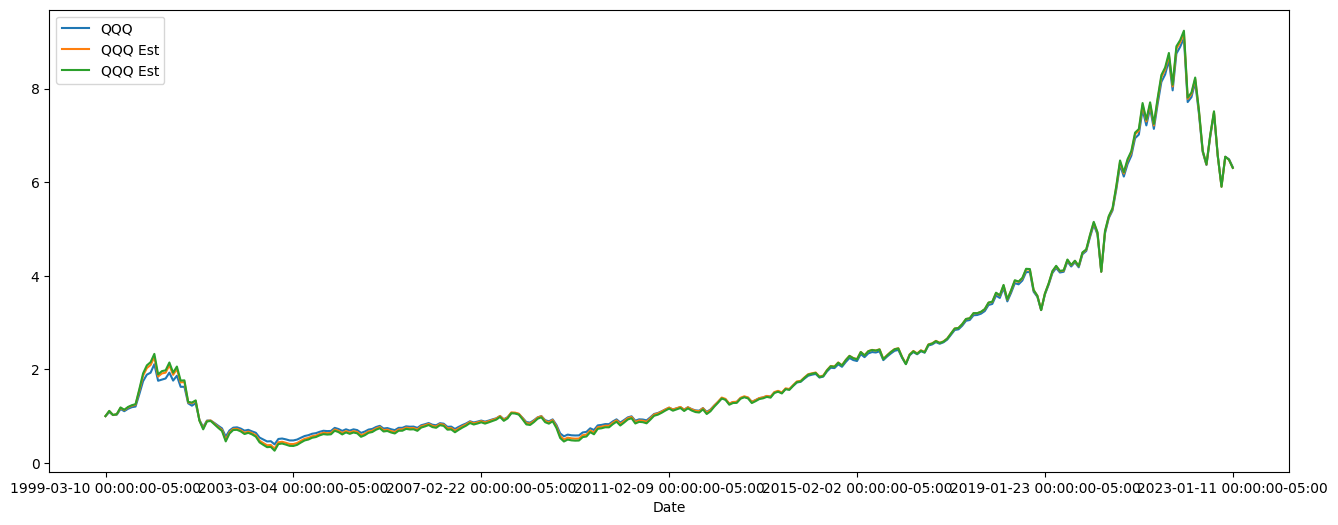

In [138]:
qqq_returns[::20].plot(legend=True, figsize=(16,6))
qqq_sim_returns_adj[::20].plot(legend=True)
qqq_sim_returns_adj2[::20].plot(legend=True)

In [140]:
tqqq_sim_aligned = af.removeNonMatches(tqqq, qqq_sim_returns_adj);
tqqq_returns = af.returns(tqqq).rename("QQQ 3x")

In [143]:
tqqq_sim_returns = af.sim_leverage(tqqq_sim_aligned, leverage=3, expense_ratio=0.0086).rename("QQQ 3x Sim")

adj = (tqqq_returns[-1] - tqqq_sim_returns[-1])/(tqqq_sim_returns[-1] - 1)
print (adj)
adj = 0.0955
tqqq_sim_returns_adj = (tqqq_sim_returns*(1+adj) - adj).rename("QQQ 3x Est")

print(tqqq_returns[0], tqqq_returns[-1])
print(tqqq_sim_returns[0], tqqq_sim_returns[-1])
print(tqqq_sim_returns_adj[0], tqqq_sim_returns_adj[-1])

0.09559250114613632
1.0 59.453458914438386
1.0 54.35328496068406
0.9999999999999999 59.44852367442938


<AxesSubplot: xlabel='Date'>

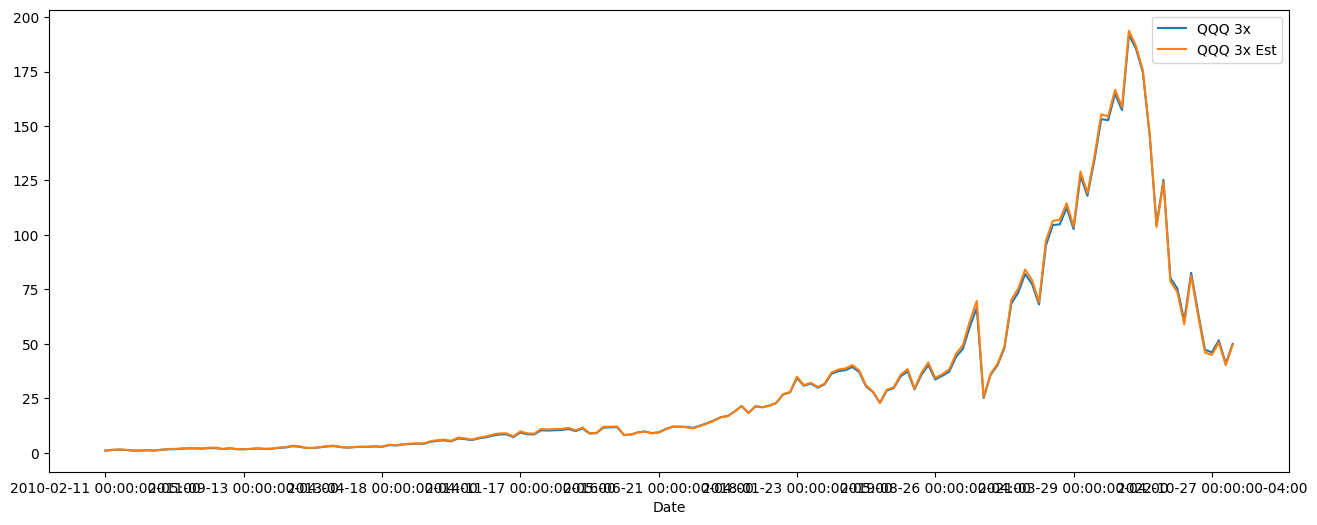

In [144]:
tqqq_returns[::20].plot(legend=True, figsize=(16,6))
tqqq_sim_returns_adj[::20].plot(legend=True)

In [20]:
# Actual saving based on above
ndx = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\NASDAQ100\NDX.csv', index_col=0, header=0).squeeze("columns"))
print(ndx.index[0])

qqq_sim = sf.returns(ndx)
qqq_sim_adj = 0.155
qqq_sim = (qqq_sim * (1 + qqq_sim_adj) - qqq_sim_adj)
sf.saveData(qqq_sim, 'QQQ_Sim_1985', r'data\prices\sim\fromIndexes\NASDAQ100')

tqqq_sim = sf.sim_leverage(qqq_sim, leverage=3, expense_ratio=0.0086)
tqqq_sim_adj = 0.0955
tqqq_sim = (tqqq_sim * (1 + tqqq_sim_adj) - tqqq_sim_adj)
sf.saveData(tqqq_sim, 'TQQQ_Sim_1985', r'data\prices\sim\fromIndexes\NASDAQ100')

1985-10-01


In [23]:
dji = pd.read_csv(r'data\prices\pulled\DJIA\^DJI.csv', index_col=0, header=0).squeeze("columns")
dia = pd.read_csv(r'data\prices\pulled\DJIA\DIA.csv', index_col=0, header=0).squeeze("columns")
udow = pd.read_csv(r'data\prices\pulled\DJIA\UDOW.csv', index_col=0, header=0).squeeze("columns")

dia_aligned = sf.removeNonMatches(dji, dia);
dia_sim_aligned = sf.removeNonMatches(dia, dji);
udow_aligned = sf.removeNonMatches(dji, udow);

In [71]:
dia_returns = sf.returns(dia_aligned).rename("DIA")
dia_sim_returns = sf.returns(dia_sim_aligned).rename("DIA Sim")
dia_sim_returns2 = sf.sim_leverage(dia_sim_aligned, leverage=1, expense_ratio=0.002).rename("DIA Sim2")

In [91]:
adj = (dia_returns[-1] - dia_sim_returns[-1])/(dia_sim_returns[-1] - 1)
print (adj)
adj = 0.88
dia_sim_returns_adj = (dia_sim_returns*(1+adj) - adj).rename("DIA Est")

adj = (dia_returns[-1] - dia_sim_returns2[-1])/(dia_sim_returns2[-1] - 1)
print (adj)
dia_sim_returns_adj2 = (dia_sim_returns2*(1+adj) - adj).rename("DIA Est")

print(dia_returns[0], dia_returns[-1])
print(dia_sim_returns_adj[0], dia_sim_returns_adj[-1])
print(dia_sim_returns_adj2[0], dia_sim_returns_adj2[-1])

0.9327596903673144
1.0654757776941959
1.0 7.150943718133632
0.9999999999999999 6.98303775048908
1.0 7.150943718133632


<AxesSubplot: xlabel='Date'>

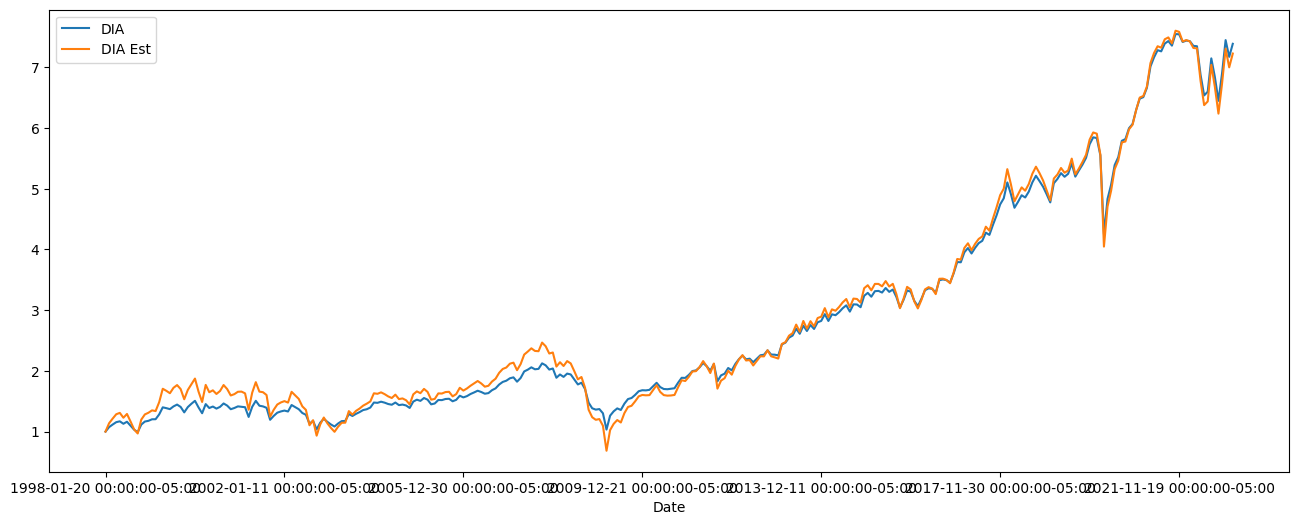

In [90]:
dia_returns[::20].plot(legend=True, figsize=(16,6))
dia_sim_returns_adj[::20].plot(legend=True)
#dia_sim_returns_adj2[::20].plot(legend=True)

In [75]:
udow_sim_aligned = sf.removeNonMatches(udow, dia_sim_returns_adj);
udow_returns = sf.returns(udow).rename("DIA 3x")

In [84]:
udow_sim_returns = sf.sim_leverage(udow_sim_aligned, leverage=2.4, expense_ratio=0.0096).rename("UDOW 3x Sim")

adj = (udow_returns[-1] - udow_sim_returns[-1])/(udow_sim_returns[-1] - 1)
print (adj)
udow_sim_returns_adj = (udow_sim_returns*(1+adj) - adj).rename("UDOW 3x Est")

0.8744378635482914


<AxesSubplot: xlabel='Date'>

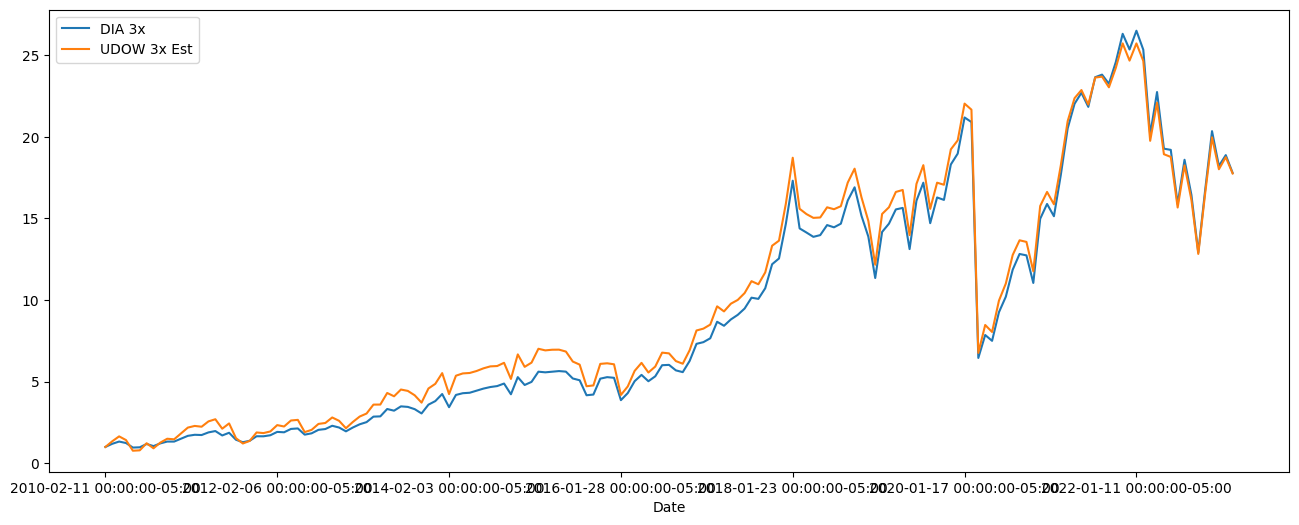

In [85]:
udow_returns[::20].plot(legend=True, figsize=(16,6))
#udow_sim_returns[::20].plot(legend=True)
udow_sim_returns_adj[::20].plot(legend=True)

In [150]:
# Actual saving based on above
dji = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\DJIA\^DJI.csv', index_col=0, header=0).squeeze("columns"))
print(dji.index[0])

dia_sim = sf.returns(dji)
dia_sim_adj = 0.88
dia_sim = (dia_sim * (1 + dia_sim_adj) - dia_sim_adj)
sf.saveData(dia_sim, 'DIA_Sim_1992', r'data\prices\sim\fromIndexes\DJIA')

udow_sim = sf.sim_leverage(dia_sim, leverage=2.4, expense_ratio=0.0096)
udow_sim_adj = 0.875
udow_sim = (udow_sim * (1 + udow_sim_adj) - udow_sim_adj)
sf.saveData(udow_sim, 'UDOW_Sim_1992', r'data\prices\sim\fromIndexes\DJIA')

1992-01-02


In [95]:
rut = pd.read_csv(r'data\prices\pulled\Russell2000\^RUT.csv', index_col=0, header=0).squeeze("columns")
iwm = pd.read_csv(r'data\prices\pulled\Russell2000\IWM.csv', index_col=0, header=0).squeeze("columns")
urty = pd.read_csv(r'data\prices\pulled\Russell2000\URTY.csv', index_col=0, header=0).squeeze("columns")

iwm_aligned = sf.removeNonMatches(rut, iwm);
iwm_sim_aligned = sf.removeNonMatches(iwm, rut);
urty_aligned = sf.removeNonMatches(rut, urty);

In [121]:
iwm_returns = sf.returns(iwm_aligned).rename("iwm")
iwm_sim_returns = sf.returns(iwm_sim_aligned).rename("iwm Sim")
iwm_sim_returns2 = sf.sim_leverage(iwm_sim_aligned, leverage=0.9, expense_ratio=0.002).rename("iwm Sim2")

In [129]:
adj = (iwm_returns[-1] - iwm_sim_returns[-1])/(iwm_sim_returns[-1] - 1)
print (adj)
adj = .42
iwm_sim_returns_adj = (iwm_sim_returns*(1+adj) - adj).rename("IWM Est")

adj = (iwm_returns[-1] - iwm_sim_returns2[-1])/(iwm_sim_returns2[-1] - 1)
print (adj)
iwm_sim_returns_adj2 = (iwm_sim_returns2*(1+adj) - adj).rename("IWM Est2")

0.4396537401712752
0.6947431107636942


<AxesSubplot: xlabel='Date'>

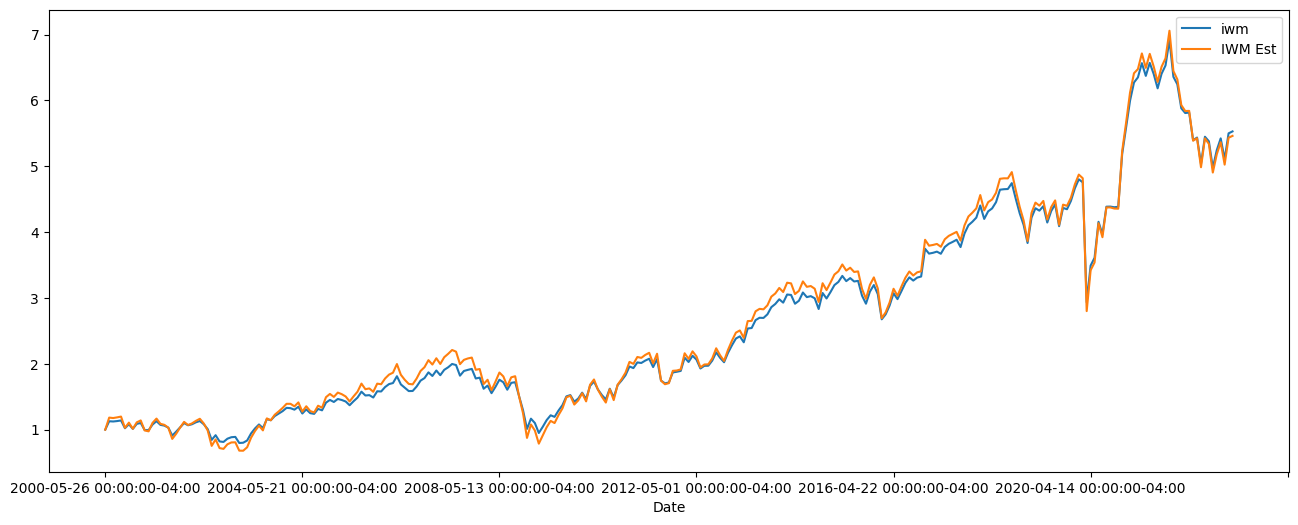

In [130]:
iwm_returns[::20].plot(legend=True, figsize=(16,6))
iwm_sim_returns_adj[::20].plot(legend=True)
#iwm_sim_returns_adj2[::20].plot(legend=True)

In [131]:
urty_sim_aligned = sf.removeNonMatches(urty, iwm_sim_returns_adj);
urty_returns = sf.returns(urty).rename("IWM 3x")

In [144]:
urty_sim_returns = sf.sim_leverage(urty_sim_aligned, leverage=2.6, expense_ratio=0.0096).rename("IWM 3x Sim")

adj = (urty_returns[-1] - urty_sim_returns[-1])/(urty_sim_returns[-1] - 1)
print (adj)
urty_sim_returns_adj = (urty_sim_returns*(1+adj) - adj).rename("IWM 3x Est")

0.5726692523597402


<AxesSubplot: xlabel='Date'>

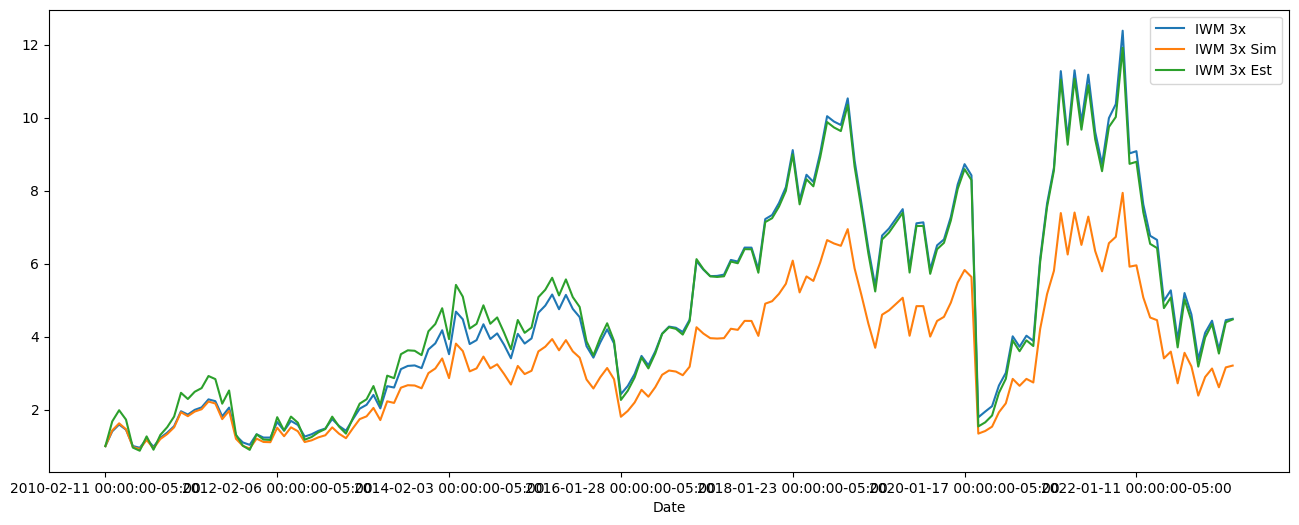

In [145]:
urty_returns[::20].plot(legend=True, figsize=(16,6))
urty_sim_returns[::20].plot(legend=True)
urty_sim_returns_adj[::20].plot(legend=True)

In [151]:
# Actual saving based on above
rut = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Russell2000\^RUT.csv', index_col=0, header=0).squeeze("columns"))
print(rut.index[0])

iwm_sim = sf.returns(rut)
iwm_sim_adj = 0.42
iwm_sim = (iwm_sim * (1 + iwm_sim_adj) - iwm_sim_adj)
sf.saveData(iwm_sim, 'IWM_Sim_1987', r'data\prices\sim\fromIndexes\Russell2000')

urty_sim = sf.sim_leverage(iwm_sim, leverage=2.6, expense_ratio=0.0096)
urty_sim_adj = 0.5726692523597402
urty_sim = (urty_sim * (1 + urty_sim_adj) - urty_sim_adj)
sf.saveData(urty_sim, 'URTY_Sim_1987', r'data\prices\sim\fromIndexes\Russell2000')

1987-09-10


In [4]:
dgs10 = pd.read_csv(r'data\prices\pulled\Treasury7-10\DGS10.csv', index_col=0, header=0).apply(lambda col:pd.to_numeric(col, errors='coerce')).squeeze("columns")
ief = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Treasury7-10\IEF.csv', index_col=0, header=0).squeeze("columns"))
tyd = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Treasury7-10\TYD.csv', index_col=0, header=0).squeeze("columns"))

ief_sim_prealigned = sf.removeNonMatches(ief, dgs10);
ief_prealigned = sf.removeNonMatches(dgs10, ief);
tyd_prealigned = sf.removeNonMatches(dgs10, tyd);

In [27]:
dgs10_monthly = utils.convertToDateTimeDate(pd.read_csv(r'data\prices\pulled\Treasury7-10\LTGOVTBD.csv', index_col=0, header=0).apply(lambda col:pd.to_numeric(col, errors='coerce')).squeeze("columns"))

In [19]:
gspc_dates = pd.read_csv(r'data\prices\pulled\SNP500\^GSPC.csv', index_col=0, header=0).squeeze("columns")
gspc_dates = utils.convertToDateTimeDate(gspc_dates[dgs10_monthly.index[0]:dgs10.index[0]])

In [ ]:
def generateMeanReturnsBasedOnReturns(dataSet, tmean, start, stop):
    std_dev = dataSet[start:stop].std()
    raw = np.random.normal(tmean, std_dev, len(dataSet[start:stop]))
    result = pd.Series(dtype="float64")
    for i, date in enumerate(dataSet[start:stop].index):
        result[date] = raw[i]
        
    
    return result + (tmean - result.mean())

In [21]:
def dateToMonth(date):
    return datetime.date(date.year, date.month, 1)

In [37]:
print(dgs10_monthly)

1925-01-01    3.96
1925-02-01    3.95
1925-03-01    3.96
1925-04-01    3.93
1925-05-01    3.87
              ... 
2000-02-01    6.49
2000-03-01    6.33
2000-04-01    6.14
2000-05-01    6.49
2000-06-01    6.23
Length: 906, dtype: float64


In [122]:
dgs10_est = pd.Series(dtype="float64")

daysTilnextMonth, daysInMonth = 1,1
nextMonthIdx = 1
month, nextMonth = dateToMonth(gspc_dates.index[0]), dateToMonth(gspc_dates.index[1])
for i, date in enumerate(gspc_dates.index):
    # get number of days until next month
    if daysTilnextMonth <= 0:
        month = nextMonth
        tmpI = i
        while tmpI < len(gspc_dates.index) and gspc_dates.index[tmpI].month == month.month:
            if tmpI + 1 >=  len(gspc_dates.index):
                break;
            tmpI += 1
        nextMonth = dateToMonth(gspc_dates.index[tmpI])
        daysTilnextMonth = tmpI - i
        daysInMonth = daysTilnextMonth
    
    if (daysInMonth > 0):
        diff = dgs10_monthly[nextMonth] - dgs10_monthly[month]
        dgs10_est[date] = dgs10_monthly[month] + diff * (daysInMonth - daysTilnextMonth)/daysInMonth

    daysTilnextMonth -= 1


In [123]:
raw = np.random.normal(1, 0.005, len(dgs10_est))
dgs10_noise = dgs10_est * raw

In [124]:
dgs10_ext = dgs10_noise.append(dgs10)

C:\Users\krjug\AppData\Local\Temp\ipykernel_31944\2235659268.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dgs10_ext = dgs10_noise.append(dgs10)


In [17]:
ief_sim_aligned = sf.bond_sim(ief_sim_prealigned, 7.8)
ief_sim_aligned.drop(ief_sim_aligned.index[-1], inplace=True)
ief_aligned = ief_prealigned.drop(ief_prealigned.index[-1])

In [18]:
ief_returns = sf.returns(ief_aligned).rename("IEF")
ief_sim_returns = sf.returns(ief_sim_aligned).rename("IEF Sim")

adj = (ief_returns[-1] - ief_sim_returns[-1])/(ief_sim_returns[-1] - 1)
print (adj)
ief_sim_returns_adj = (ief_sim_returns*(1+adj) - adj).rename("IEF Est")


print(ief_returns[0], ief_returns[-1])
print(ief_sim_returns[0], ief_sim_returns[-1])
print(ief_sim_returns_adj[0], ief_sim_returns_adj[-1])

0.24667218494559875
1.0 2.187824228635287
1.0 1.952795965915547
1.0 2.1878242286352876


In [1]:
ief_returns[2000::20].plot(legend=True, figsize=(16,6))
ief_sim_returns_adj[::20].plot(legend=True)

NameError: name 'ief_returns' is not defined

In [149]:
tyd_aligned = tyd_prealigned.drop(tyd_prealigned.index[-1])
tyd_sim_aligned = af.removeNonMatches(tyd_aligned, ief_sim_returns_adj);
tyd_returns = af.returns(tyd_aligned).rename("IEF 3x")

In [154]:
tyd_sim_returns = af.sim_leverage(tyd_sim_aligned, leverage=2.8, expense_ratio=0.0095)

adj = (tyd_returns[-1] - tyd_sim_returns[-1])/(tyd_sim_returns[-1] - 1)
print (adj)
tyd_sim_returns_adj = (tyd_sim_returns*(1+adj) - adj).rename("IEF 3x Est")

print(tyd_returns[0], tyd_returns[-1])
print(tyd_sim_returns[0], tyd_sim_returns[-1])
print(tyd_sim_returns_adj[0], tyd_sim_returns_adj[-1])

0.3168621598074825
1.0 1.5494373369957877
1.0 1.4172322311061867
1.0 1.5494373369957877


<AxesSubplot: xlabel='DATE'>

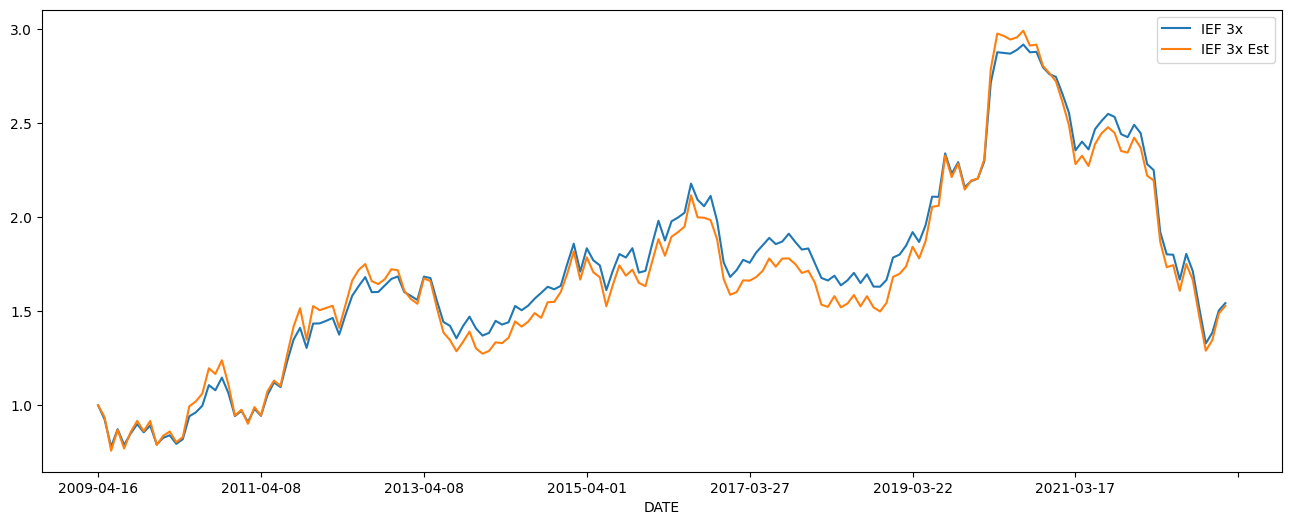

In [155]:
tyd_returns[::20].plot(legend=True, figsize=(16,6))
tyd_sim_returns_adj[::20].plot(legend=True)

In [17]:
# Actual saving based on above
dgs10 = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Treasury7-10\DGS10.csv', index_col=0, header=0).apply(lambda col:pd.to_numeric(col, errors='coerce')).squeeze("columns"))
print(dgs10.index[0])

ief_price = sf.bond_sim(dgs10, 7.8)
ief_price.drop(ief_price.index[-1], inplace=True)
ief_sim = sf.returns(ief_price)
ief_sim_adj = 0.24667218494559875
ief_sim = (ief_sim * (1 + ief_sim_adj) - ief_sim_adj)
sf.saveData(ief_sim, 'IEF_Sim_1962', r'data\prices\sim\fromIndexes\Treasury7-10')

tyd_sim = sf.sim_leverage(ief_sim, leverage=2.8, expense_ratio=0.0095)
tyd_sim_adj = 0.3168621598074825
tyd_sim = (tyd_sim * (1 + tyd_sim_adj) - tyd_sim_adj)
sf.saveData(tyd_sim, 'TYD_Sim_1962', r'data\prices\sim\fromIndexes\Treasury7-10')

1962-01-02


In [127]:
print(dgs10_ext.index[0])

ief_price = sf.bond_sim(dgs10_ext, 7.8)
ief_price.drop(ief_price.index[-1], inplace=True)
ief_sim = sf.returns(ief_price)
ief_sim_adj = 0.24667218494559875
ief_sim = (ief_sim * (1 + ief_sim_adj) - ief_sim_adj)
sf.saveData(ief_sim, 'IEF_Sim_1927', r'data\prices\sim\fromIndexes\Treasury7-10')

tyd_sim = sf.sim_leverage(ief_sim, leverage=2.8, expense_ratio=0.0095)
tyd_sim_adj = 0.3168621598074825
tyd_sim = (tyd_sim * (1 + tyd_sim_adj) - tyd_sim_adj)
sf.saveData(tyd_sim, 'TYD_Sim_1927', r'data\prices\sim\fromIndexes\Treasury7-10')

1927-12-30


<AxesSubplot: >

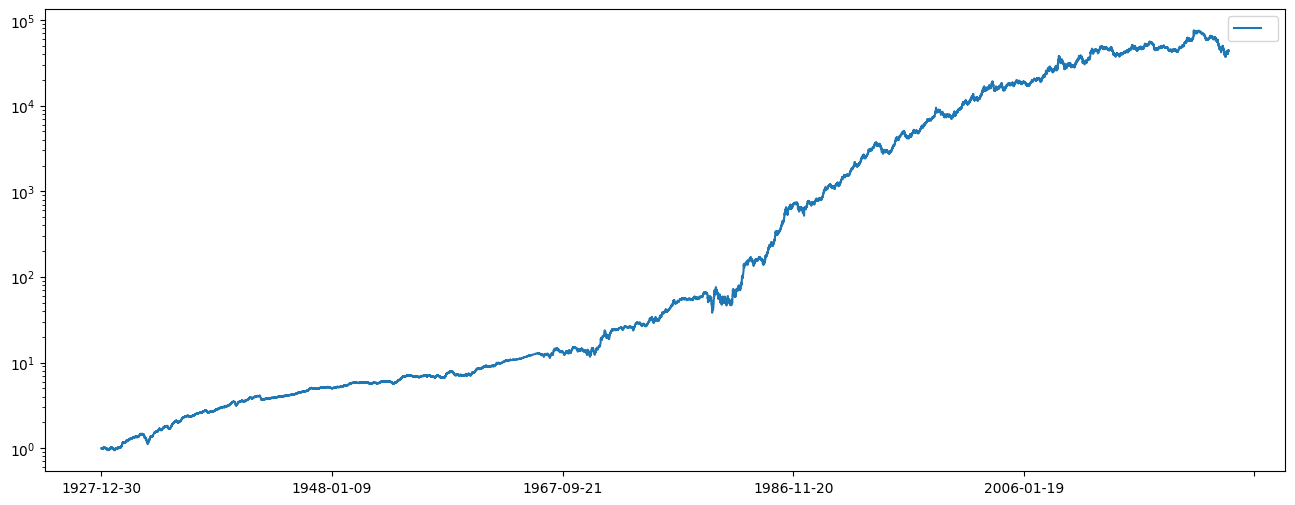

In [135]:
tyd_sim.plot(legend=True, logy=True, figsize=(16,6))

In [40]:
dgs20 = pd.read_csv(r'data\prices\pulled\Treasury20\DGS20.csv', index_col=0, header=0).apply(lambda col:pd.to_numeric(col, errors='coerce')).squeeze("columns")
tlt = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Treasury20\TLT.csv', index_col=0, header=0).squeeze("columns"))
tmf = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Treasury20\TMF.csv', index_col=0, header=0).squeeze("columns"))

tlt_sim_prealigned = sf.removeNonMatches(tlt, dgs20);
tlt_prealigned = sf.removeNonMatches(dgs20, tlt);
tmf_prealigned = sf.removeNonMatches(dgs20, tmf);

In [41]:
tlt_sim_aligned = sf.bond_sim(tlt_sim_prealigned, 17.5)
tlt_sim_aligned.drop(tlt_sim_aligned.index[-1], inplace=True)
tlt_aligned = tlt_prealigned.drop(tlt_prealigned.index[-1])

In [45]:
tlt_returns = sf.returns(tlt_aligned).rename("TLT")
tlt_sim_returns = sf.returns(tlt_sim_aligned).rename("TLT Sim")
tlt_sim_returns2 = sf.sim_leverage(tlt_sim_aligned, leverage=1, expense_ratio=0.0015).rename("TLT Sim2")

adj = (tlt_returns[-1] - tlt_sim_returns[-1])/(tlt_sim_returns[-1] - 1)
print (adj)
#adj = -.2
tlt_sim_returns_adj = (tlt_sim_returns*(1+adj) - adj).rename("TLT Est")

adj = (tlt_returns[-1] - tlt_sim_returns2[-1])/(tlt_sim_returns2[-1] - 1)
print (adj)
#adj = -.2
tlt_sim_returns_adj2 = (tlt_sim_returns2*(1+adj) - adj).rename("TLT Est2")


print(tlt_returns[0], tlt_returns[-1])
print(tlt_sim_returns[0], tlt_sim_returns[-1])
print(tlt_sim_returns_adj[0], tlt_sim_returns_adj[-1])

0.14673341926259362
0.20905681929216482
1.0 2.6301600406746863
1.0 2.4215684424048267
0.9999999999999999 2.630160040674686


<AxesSubplot: xlabel='DATE'>

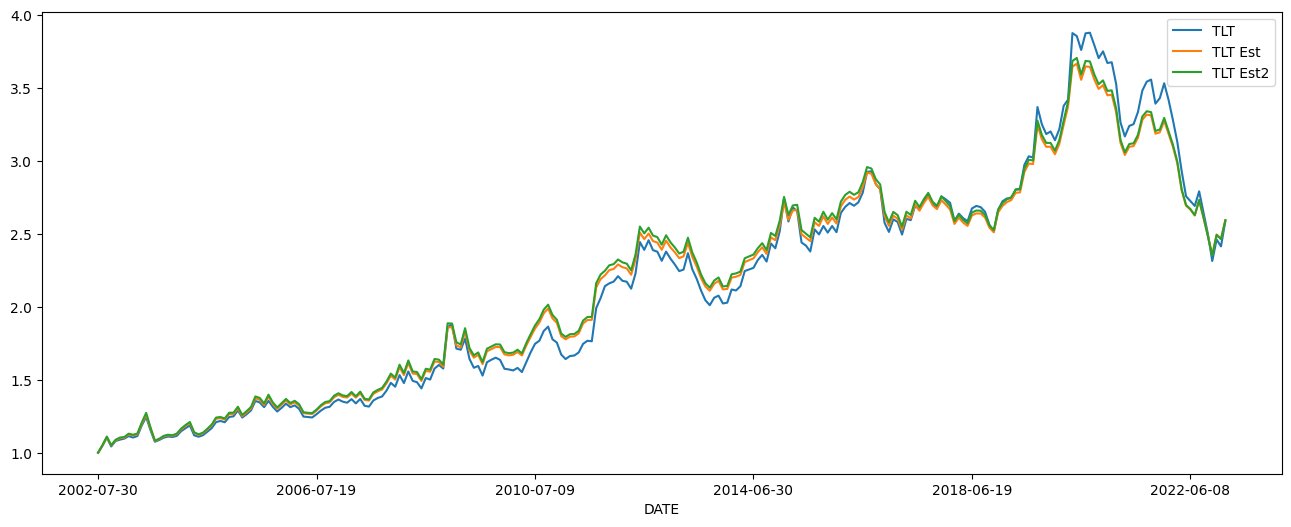

In [52]:
tlt_returns[::20].plot(legend=True, figsize=(16,6))
tlt_sim_returns_adj[::20].plot(legend=True)
tlt_sim_returns_adj2[::20].plot(legend=True)

In [54]:
tmf_aligned = tmf_prealigned.drop(tmf_prealigned.index[-1])
tmf_sim_aligned = sf.removeNonMatches(tmf_aligned, tlt_sim_returns_adj);
tmf_returns = sf.returns(tmf_aligned).rename("TLT 3x")

In [94]:
tmf_sim_returns = sf.sim_leverage(tmf_sim_aligned, leverage=3.5, expense_ratio=0.0088)

adj = (tmf_returns[-1] - tmf_sim_returns[-1])/(tmf_sim_returns[-1] - 1)
print (adj)
adj = -0.05
tmf_sim_returns_adj = (tmf_sim_returns*(1+adj) - adj).rename("TLT 3x Est")

print(tmf_returns[0], tmf_returns[-1])
print(tmf_sim_returns[0], tmf_sim_returns[-1])
print(tmf_sim_returns_adj[0], tmf_sim_returns_adj[-1])

-2.885770339404601
1.0 0.8716989970471841
1.0 1.068036388245095
1.0 1.0646345688328402


<AxesSubplot: xlabel='DATE'>

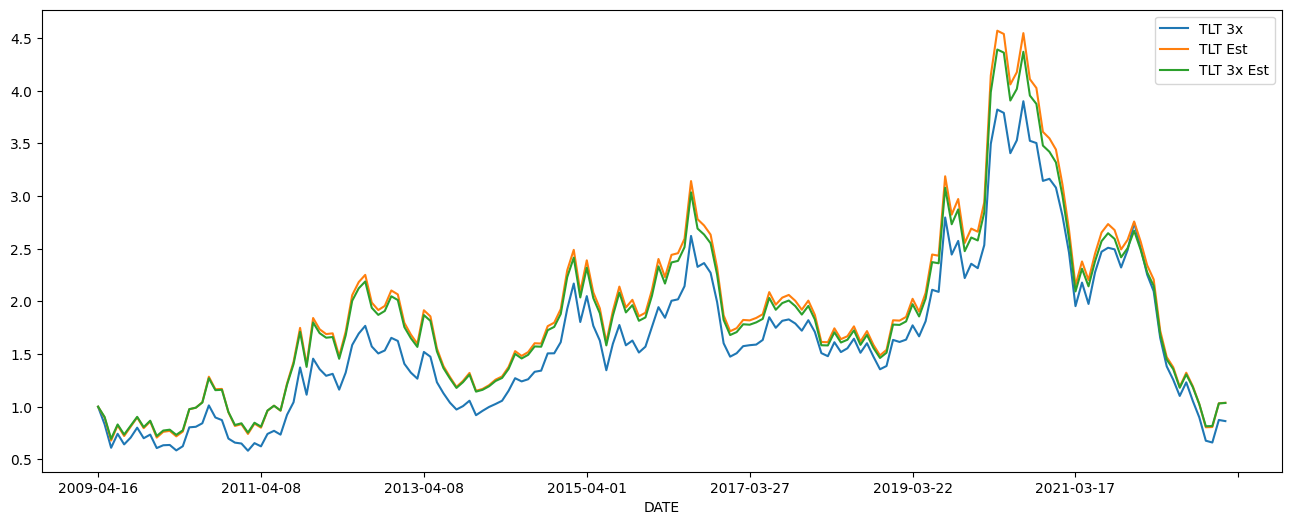

In [95]:
tmf_returns[::20].plot(legend=True, figsize=(16,6))
tmf_sim_returns[::20].plot(legend=True)
tmf_sim_returns_adj[::20].plot(legend=True)

In [97]:
# Actual saving based on above
dgs20 = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Treasury20\DGS20.csv', index_col=0, header=0).apply(lambda col:pd.to_numeric(col, errors='coerce')).squeeze("columns"))
print(dgs20.index[0])

tlt_price = sf.bond_sim(dgs20, 17.5)
tlt_price.drop(tlt_price.index[-1], inplace=True)
tlt_sim = sf.returns(tlt_price)
tlt_sim_adj = -.2
tlt_sim = (tlt_sim * (1 + tlt_sim_adj) - tlt_sim_adj)
sf.saveData(tlt_sim, 'TLT_Sim_1962', r'data\prices\sim\fromIndexes\Treasury20')

tmf_sim = sf.sim_leverage(tlt_sim, leverage=3.5, expense_ratio=0.0088)
tmf_sim_adj = -.05
tmf_sim = (tmf_sim * (1 + tmf_sim_adj) - tmf_sim_adj)
sf.saveData(tmf_sim, 'TMF_Sim_1962', r'data\prices\sim\fromIndexes\Treasury20')

1962-01-02


In [232]:
gold = pd.read_csv(r'data\prices\pulled\Gold\goldValue.csv', index_col=0, header=0).squeeze("columns")
iau = af.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Gold\IAU.csv', index_col=0, header=0).squeeze("columns"))
ugl = af.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Gold\UGL.csv', index_col=0, header=0).squeeze("columns"))

iau_sim_aligned = af.removeNonMatches(iau, gold);
iau_aligned = af.removeNonMatches(gold, iau);
ugl_aligned = af.removeNonMatches(iau, ugl);

In [233]:
iau_returns = af.returns(iau_aligned).rename("IAU")
iau_sim_returns = af.returns(iau_sim_aligned).rename("IAU Sim")

In [246]:
adj = (iau_returns[-1] - iau_sim_returns[-1])/(iau_sim_returns[-1] - 1)
print (adj)
iau_sim_returns_adj = (iau_sim_returns*(1+adj) - adj).rename("IAU Est")

print(iau_returns[0], iau_returns[-1])
print(iau_sim_returns[0], iau_sim_returns[-1])
print(iau_sim_returns_adj[0], iau_sim_returns_adj[-1])

-0.0691272237112889
1.0 4.142656182876729
1.0 4.376031894934299
1.0 4.142656182876729


<AxesSubplot: xlabel='Date'>

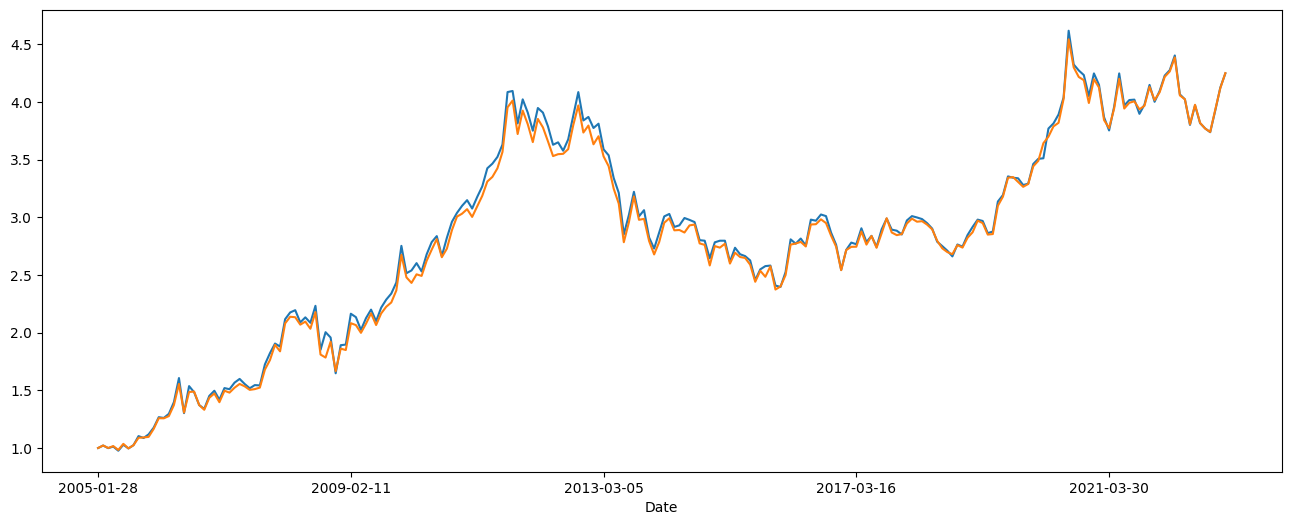

In [248]:
iau_returns[::20].plot(legend=False, figsize=(16,6))
iau_sim_returns_adj[::20].plot(legend=False)

In [252]:
ugl_aligned = af.removeNonMatches(iau_sim_returns_adj, ugl_aligned);
ugl_sim_aligned = af.removeNonMatches(ugl_aligned, iau_sim_returns_adj);
ugl_returns = af.returns(ugl_aligned).rename("IEF 2x")

In [264]:
ugl_sim_returns = af.sim_leverage(ugl_sim_aligned, leverage=2.5, expense_ratio=0.01)

adj = (ugl_returns[-1] - ugl_sim_returns[-1])/(ugl_sim_returns[-1] - 1)
print (adj)
ugl_sim_returns_adj = (ugl_sim_returns*(1+adj) - adj).rename("IEF 2x Est")

print(ugl_returns[0], ugl_returns[-1])
print(ugl_sim_returns[0], ugl_sim_returns[-1])
print(ugl_sim_returns_adj[0], ugl_sim_returns_adj[-1])

-0.3842457009676864
1.0 2.306204769631937
1.0 3.1213084044799984
1.0 2.306204769631937


<AxesSubplot: xlabel='Date'>

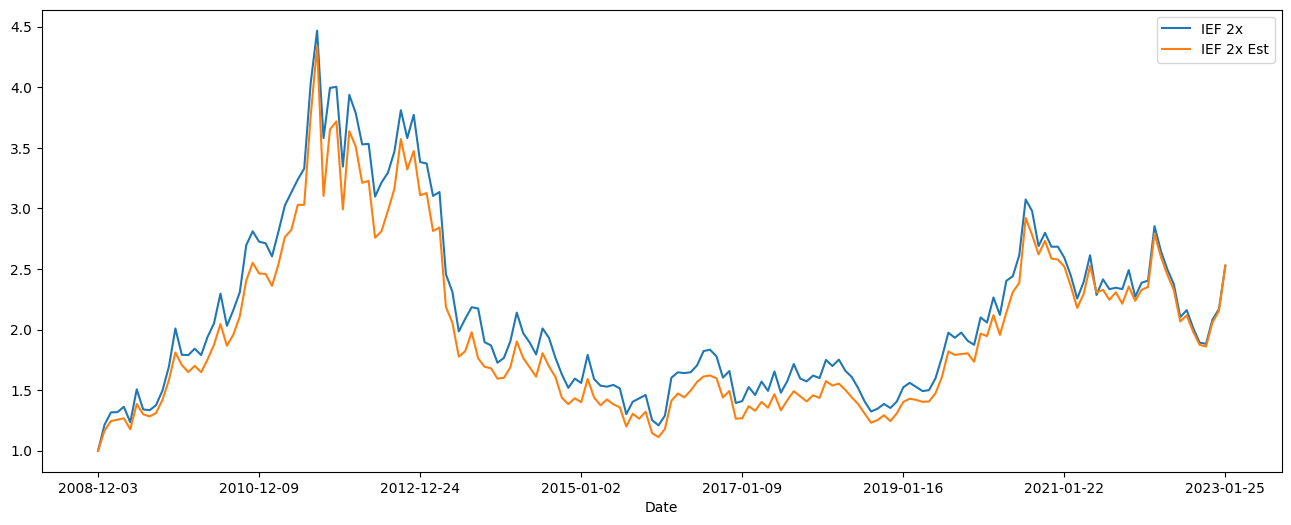

In [265]:
ugl_returns[::20].plot(legend=True, figsize=(16,6))
ugl_sim_returns_adj[::20].plot(legend=True)

In [41]:
# Actual saving based on above
gold = pd.read_csv(r'data\prices\pulled\Gold\goldValue.csv', index_col=0, header=0).squeeze("columns")
#gspc = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\SNP500\^GSPC.csv', index_col=0, header=0).squeeze("columns"))[gold.index[0]:]

gold2 = pd.Series(dtype="float64")
prevDate = gold.index[0]
for i, date in enumerate(gspc.index):
    if not (date in gold.index):
        gold2[date] = gold2[prevDate]
    else:
        gold2[date] = gold[date]
    prevDate = date

iau_sim = sf.returns(gold2)
iau_sim_adj = -0.0691272237112889
iau_sim = (iau_sim * (1 + iau_sim_adj) - iau_sim_adj)
sf.saveData(iau_sim, 'IEF_Sim_1985', r'data\prices\sim\fromIndexes\Gold')

ugl_sim = sf.sim_leverage(iau_sim, leverage=2.5, expense_ratio=0.01)
ugl_sim_adj = -0.3842457009676864
ugl_sim = (ugl_sim * (1 + ugl_sim_adj) - ugl_sim_adj)
sf.saveData(ugl_sim, 'UGL_Sim_1985', r'data\prices\sim\fromIndexes\Gold')

In [6]:
dju = pd.read_csv(r'data\prices\pulled\Utils\^DJU.csv', index_col=0, header=0).squeeze("columns")
idu = pd.read_csv(r'data\prices\pulled\Utils\IDU.csv', index_col=0, header=0).squeeze("columns")
utsl = pd.read_csv(r'data\prices\pulled\Utils\UTSL.csv', index_col=0, header=0).squeeze("columns")

dju_aligned = sf.removeNonMatches(dju, idu);
idu_sim_aligned = sf.removeNonMatches(idu, dju);
utsl_aligned = sf.removeNonMatches(dju, utsl);

In [51]:
idu_returns = sf.returns(idu_sim_aligned).rename("IDU")
idu_sim_returns = sf.returns(dju_aligned).rename("IDU Sim")
idu_sim_returns2 = sf.sim_leverage(dju_aligned, leverage=1, expense_ratio=0.025).rename("IDU Sim 2")

In [52]:
adj = (idu_returns[-1] - idu_sim_returns[-1])/(idu_sim_returns[-1] - 1)
print (adj)
#adj = 0.155
idu_sim_returns_adj = (idu_sim_returns*(1+adj) - adj).rename("idu Est")

adj = (idu_returns[-1] - idu_sim_returns2[-1])/(idu_sim_returns2[-1] - 1)
print (adj)
idu_sim_returns_adj2 = (idu_sim_returns2*(1+adj) - adj).rename("idu Est 2")

-0.5149157164899981
0.05263108139569716


<AxesSubplot: xlabel='Date'>

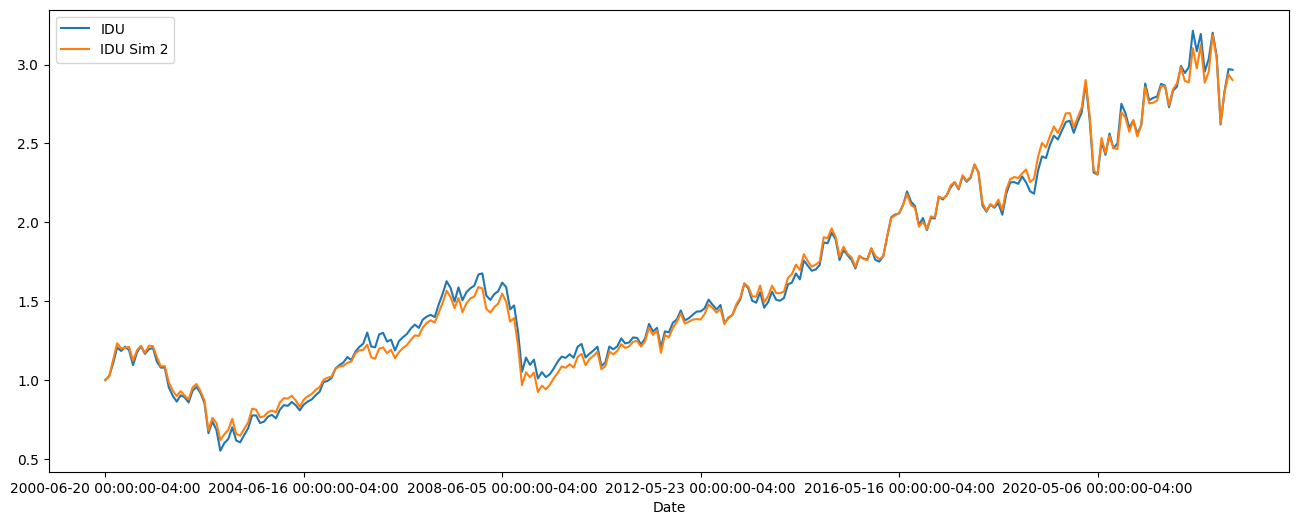

In [53]:
idu_returns[::20].plot(legend=True, figsize=(16,6))
#idu_sim_returns_adj[::20].plot(legend=True)
#idu_sim_returns_adj2[::20].plot(legend=True)
idu_sim_returns2[::20].plot(legend=True)

In [55]:
utsl_sim_aligned = sf.removeNonMatches(utsl, idu_sim_returns_adj);
utsl_returns = sf.returns(utsl).rename("IDU 3x")

In [68]:
utsl_sim_returns = sf.sim_leverage(utsl_sim_aligned, leverage=3.2, expense_ratio=0.0097).rename("utsl 3x Sim")

adj = (utsl_returns[-1] - utsl_sim_returns[-1])/(utsl_sim_returns[-1] - 1)
print (adj)
#adj = 0.0955
utsl_sim_returns_adj = (utsl_sim_returns*(1+adj) - adj).rename("utsl 3x Est")

print(utsl_returns[0], utsl_returns[-1])
print(utsl_sim_returns[0], utsl_sim_returns[-1])
print(utsl_sim_returns_adj[0], utsl_sim_returns_adj[-1])

-0.10168880493280921
1.0 1.3524502109271541
1.0 1.392347566035612
1.0 1.3524502109271543


<AxesSubplot: xlabel='Date'>

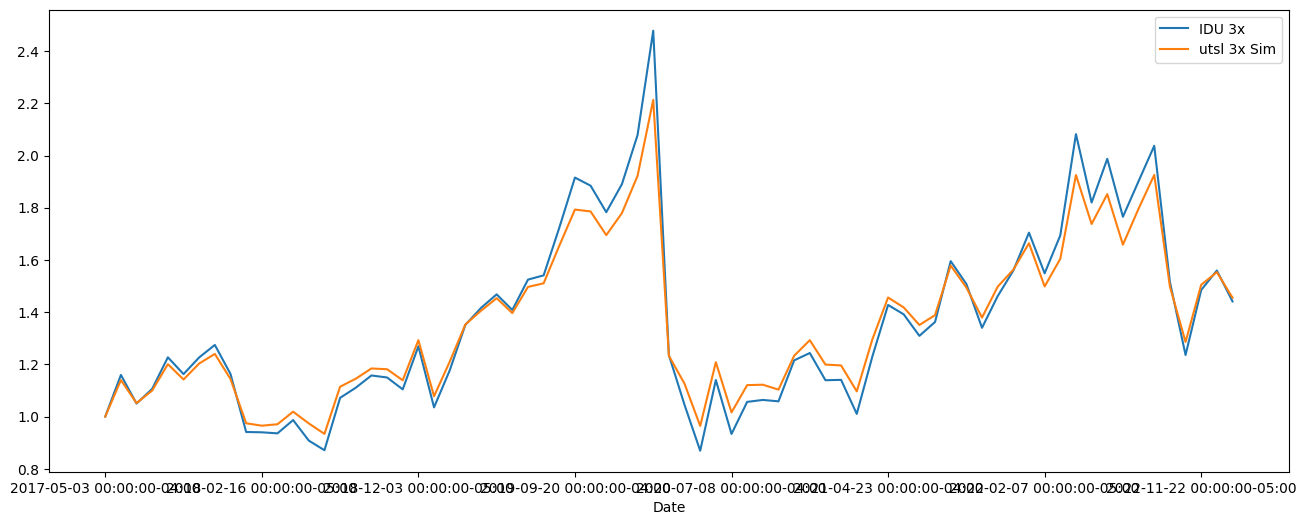

In [69]:
utsl_returns[::20].plot(legend=True, figsize=(16,6))
utsl_sim_returns[::20].plot(legend=True)

In [14]:
# Actual saving based on above
dju = sf.convertToDateOnlyIndex(pd.read_csv(r'data\prices\pulled\Utils\^DJU.csv', index_col=0, header=0).squeeze("columns"))

print(dju.index[0])

idu_sim = sf.sim_leverage(dju, leverage=1, expense_ratio=0.025)
sf.saveData(idu_sim, 'IDU_Sim_1992', r'data\prices\sim\fromIndexes\Utils')

utsl_sim = sf.sim_leverage(idu_sim, leverage=3.3, expense_ratio=0.0097)
sf.saveData(utsl_sim, 'UTSL_Sim_1992', r'data\prices\sim\fromIndexes\Utils')

1992-01-02
